<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Social_Media_Addiction_Level_Classification_Using_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social Media Addiction Level Classification Using Machine Learning Algorithms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Students-Social-Media-Addiction.csv")
df.head()

print("shape")
df.shape
# Show last rows
print(" Show last rows")
print(df.tail())

print(df.columns)
# Check for missing values

print("Check for missing values")
print(df.isnull().sum())

print("duplicate values")
print(df.duplicated().sum())
df = df.drop_duplicates()





Mounted at /content/drive
shape
 Show last rows
     Student_ID  Age  Gender Academic_Level Country  Avg_Daily_Usage_Hours  \
700         701   20  Female  Undergraduate   Italy                    4.7   
701         702   23    Male       Graduate  Russia                    6.8   
702         703   21  Female  Undergraduate   China                    5.6   
703         704   24    Male       Graduate   Japan                    4.3   
704         705   19  Female  Undergraduate  Poland                    6.2   

    Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
700             TikTok                           No                    7.2   
701          Instagram                          Yes                    5.9   
702             WeChat                          Yes                    6.7   
703            Twitter                           No                    7.5   
704           Facebook                          Yes                    6.3   

     Mental_He

In [ ]:

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

✅ Dataset loaded successfully!
Shape: (705, 13)
Columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


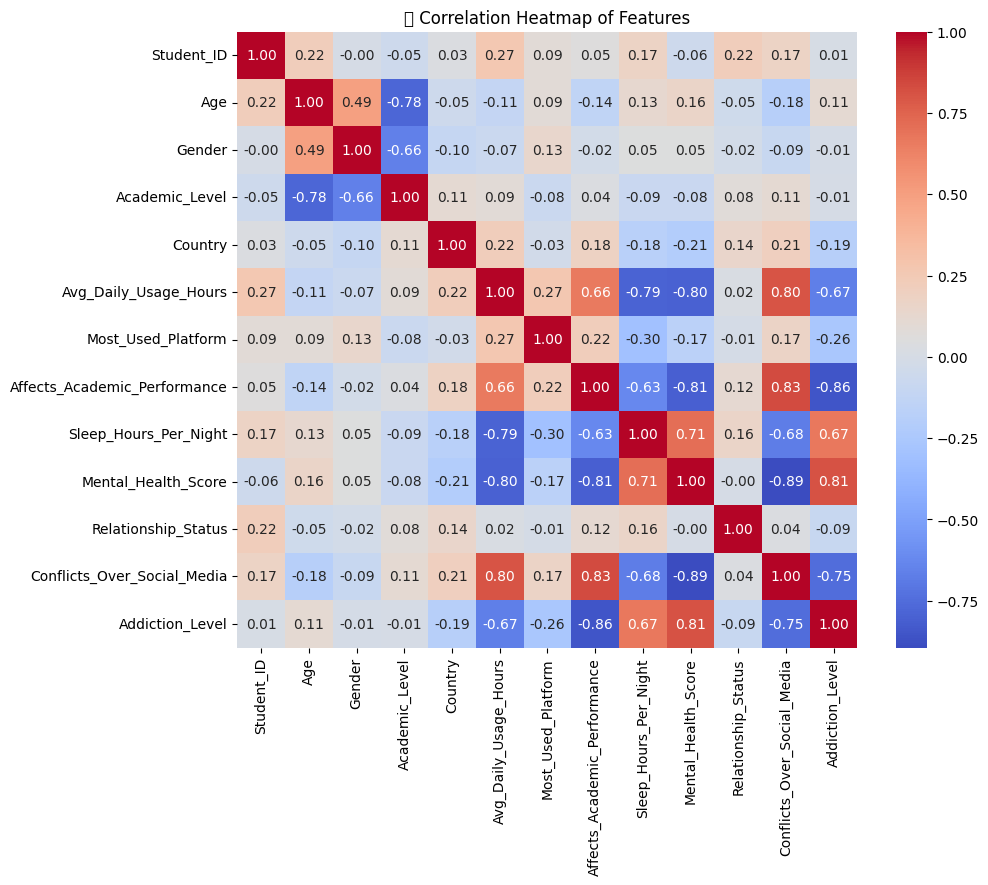


📊 Top 10 Features Most Correlated with Addiction Level:
Addiction_Level          1.000000
Mental_Health_Score      0.814916
Sleep_Hours_Per_Night    0.673162
Age                      0.112229
Student_ID               0.006280
Academic_Level          -0.005838
Gender                  -0.009030
Relationship_Status     -0.090309
Country                 -0.190609
Most_Used_Platform      -0.261511
Name: Addiction_Level, dtype: float64

▶️ Training Random Forest...


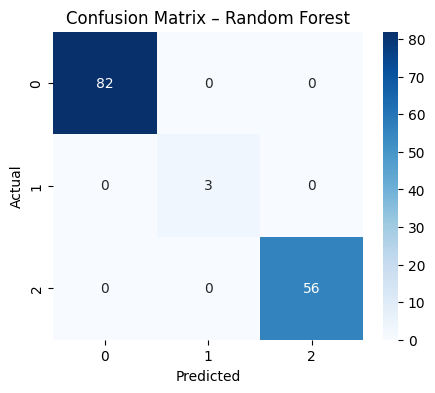


▶️ Training XGBoost...


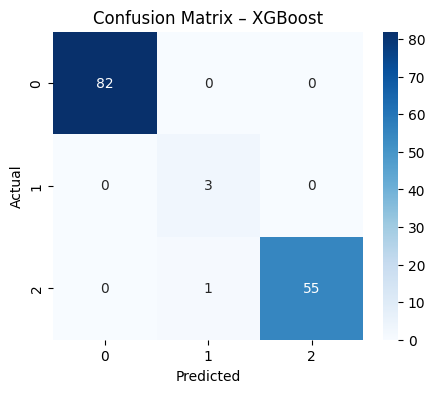


▶️ Training LightGBM...


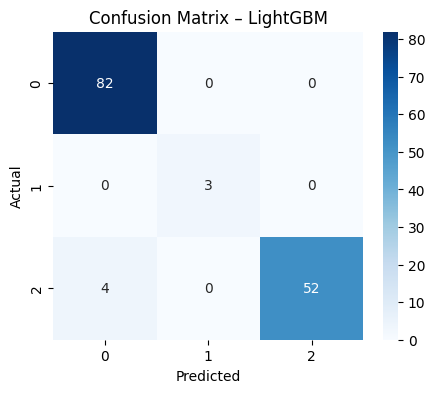


▶️ Training Gradient Boosting...


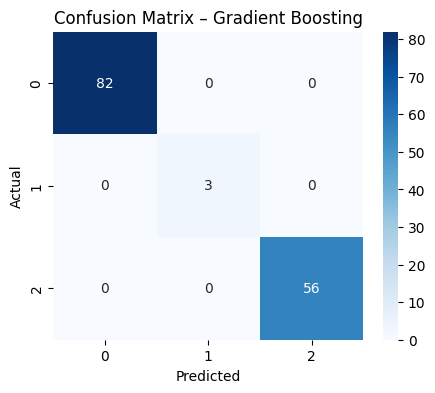


📈 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
1,XGBoost,0.992908,0.994681,0.992908,0.993382
2,LightGBM,0.971631,0.972951,0.971631,0.971444


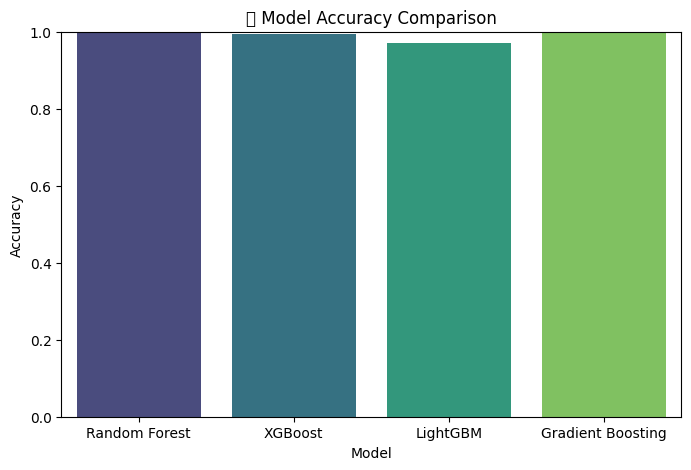

In [ ]:
# SOCIAL MEDIA ADDICTION CLASSIFICATION


!pip install xgboost lightgbm --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb


def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Students-Social-Media-Addiction.csv")


#  Create Target Column (Addiction_Level)

if "Addicted_Score" in df.columns:
    bins = [-np.inf, 3, 6, np.inf]
    labels = ["Low", "Medium", "High"]
    df["Addiction_Level"] = pd.cut(df["Addicted_Score"], bins=bins, labels=labels)
    df = df.drop(columns=["Addicted_Score"])
    target_col = "Addiction_Level"
else:
    target_col = df.columns[-1]

# Encode target
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

#  Data Cleaning & Encoding

df = df.dropna().copy()
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# Correlation Analysis

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Heatmap of Features")
plt.show()

# 🔍 Top 10 most correlated features with Addiction Level
corr_target = corr[target_col].sort_values(ascending=False)
print("\n📊 Top 10 Features Most Correlated with Addiction Level:")
print(corr_target.head(10))

# Split Data

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Models

models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False),
     "LightGBM": lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=-1,
        num_leaves=31,
        min_data_in_leaf=1,
        learning_rate=0.05,
        verbosity=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and Evaluate Models
results = []
for name, model in models.items():
    print(f"\n▶️ Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.append([name, acc, prec, rec, f1])
    plot_confusion(y_test, y_pred, name)

# Model Comparison
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score"])
print("\n📈 Model Performance Summary:")
display(results_df.sort_values("Accuracy", ascending=False))

#Optional: Bar Chart Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("📊 Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
#  --- INTERACTIVE PREDICTION SECTION  ---

best_model = models["LightGBM"]

print("\n🔮 Enter new user information to predict addiction level:\n")

new_data = {
    "Age": float(input("Enter Age: ")),
    "Gender": int(input("Enter Gender (0=Female, 1=Male): ")),
    "Academic_Level": int(input("Enter Academic Level (1=High school, 2=Undergraduate, 3=Graduate): ")),
    "Country": int(input("Enter Country (encoded number): ")),
    "Avg_Daily_Usage_Hours": float(input("Average daily usage hours on social media: ")),
    "Most_Used_Platform": int(input("Most used platform (encoded number): ")),
    "Affects_Academic_Performance": int(input("Effect on academic performance (1–10): ")),
    "Sleep_Hours_Per_Night": float(input("Sleep hours per night: ")),
    "Mental_Health_Score": int(input("Mental health score (1–10): ")),
    "Relationship_Status": int(input("Relationship status (encoded number): ")),
    "Conflicts_Over_Social_Media": int(input("Conflicts over social media (1–10): "))
}

user_df = pd.DataFrame([new_data])

# If 'Student_ID' was in training, add a placeholder
if 'Student_ID' in X.columns:
    user_df['Student_ID'] = 0  # dummy ID

# Reorder columns exactly as training data
user_df = user_df[X.columns]

# Scale numeric features
user_scaled = scaler.transform(user_df)

pred = best_model.predict(user_scaled)[0]
pred_label = label_encoder.inverse_transform([int(pred)])[0]

print("\n🧠 Predicted Social Media Addiction Level:", pred_label)

if pred_label == "High":
    print("⚠️ This person shows signs of high social media addiction. Recommend digital detox and mindfulness breaks.")
elif pred_label == "Medium":
    print("⚠️ Moderate signs of addiction. Balanced social media use suggested.")
else:
    print("✅ Low addiction level. Healthy and controlled usage pattern.")



🔮 Enter new user information to predict addiction level:

Enter Age: 25
Enter Gender (0=Female, 1=Male): 0
Enter Academic Level (1=High school, 2=Undergraduate, 3=Graduate): 3
Enter Country (encoded number): 1
Average daily usage hours on social media: 5
Most used platform (encoded number): 4
Effect on academic performance (1–10): 7
Sleep hours per night: 8
Mental health score (1–10): 7
Relationship status (encoded number): 1
Conflicts over social media (1–10): 1

🧠 Predicted Social Media Addiction Level: Medium
⚠️ Moderate signs of addiction. Balanced social media use suggested.
